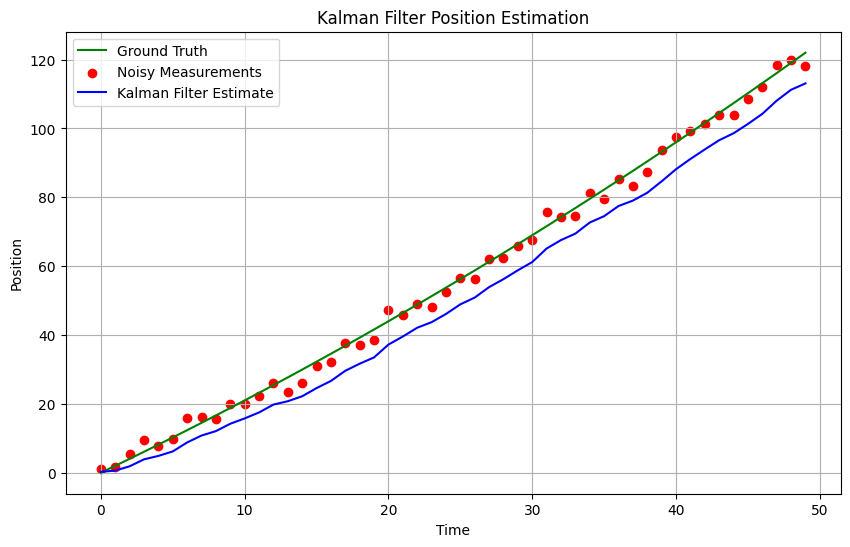

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class KalmanFilter:
    def __init__(self, process_variance, measurement_variance, initial_estimate_error, initial_estimate):
        # Initialize state estimate
        self.estimate = initial_estimate
        # Initial estimate error covariance
        self.estimate_error = initial_estimate_error

        # Process noise covariance
        self.process_variance = process_variance
        # Measurement noise covariance
        self.measurement_variance = measurement_variance

    def update(self, measurement):
        # Prediction update
        self.estimate_error += self.process_variance

        # Measurement update
        kalman_gain = self.estimate_error / (self.estimate_error + self.measurement_variance)
        self.estimate += kalman_gain * (measurement - self.estimate)
        self.estimate_error = (1 - kalman_gain) * self.estimate_error

        return self.estimate

# Simulation parameters
np.random.seed(42)  # For reproducibility
time_steps = 50
initial_position = 0
initial_velocity = 2  # m/s
acceleration = 0.02  # m/s^2
process_variance = .5
measurement_variance = 5

# Generate ground truth data (position) with constant acceleration
time = np.arange(0, time_steps, 1)
true_position = initial_position + initial_velocity * time + 0.5 * acceleration * time**2

# Add noise to simulate sensor data
noisy_measurements = true_position + np.random.normal(0, np.sqrt(measurement_variance), size=time_steps)

# Initialize the Kalman filter
kf = KalmanFilter(process_variance, measurement_variance, 1.0, 0.0)

# Apply the Kalman filter to the noisy measurements
kalman_estimates = []
for measurement in noisy_measurements:
    estimate = kf.update(measurement)
    kalman_estimates.append(estimate)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time, true_position, label="Ground Truth", color='g')
plt.scatter(time, noisy_measurements, label="Noisy Measurements", color='r', marker='o')
plt.plot(time, kalman_estimates, label="Kalman Filter Estimate", color='b')
plt.xlabel("Time")
plt.ylabel("Position")
plt.title("Kalman Filter Position Estimation")
plt.legend()
plt.grid(True)
plt.show()

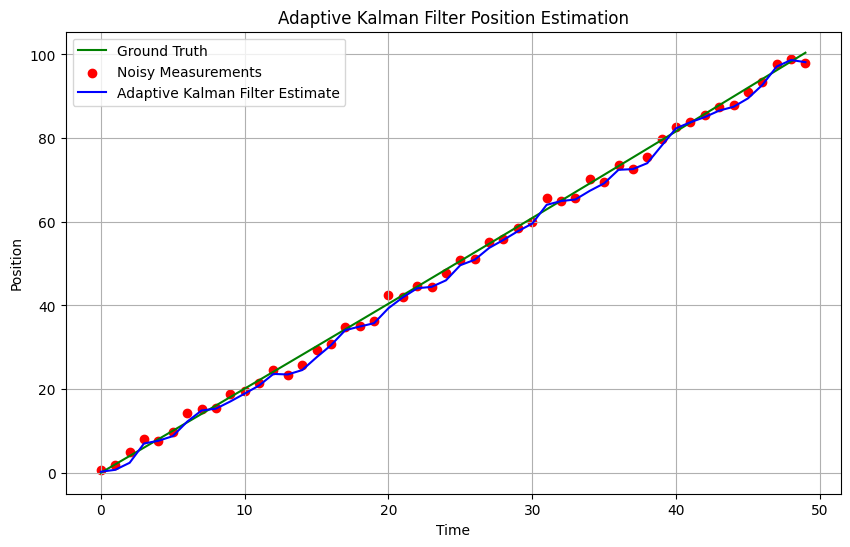

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class AdaptiveKalmanFilter:
    def __init__(self, initial_process_variance, initial_measurement_variance, initial_estimate_error, initial_estimate):
        self.estimate = initial_estimate
        self.estimate_error = initial_estimate_error
        self.process_variance = initial_process_variance
        self.measurement_variance = initial_measurement_variance

    def update(self, measurement):
        # Prediction update
        self.estimate_error += self.process_variance

        # Measurement update
        kalman_gain = self.estimate_error / (self.estimate_error + self.measurement_variance)
        innovation = measurement - self.estimate
        self.estimate += kalman_gain * innovation
        self.estimate_error = (1 - kalman_gain) * self.estimate_error

        # Adaptive update of process variance based on the innovation
        self.process_variance = max(1e-5, kalman_gain * innovation**2)

        return self.estimate

# Simulation parameters
np.random.seed(42)
time_steps = 50
initial_position = 0
initial_velocity = 2  # m/s
acceleration = 0.002  # m/s^2
initial_process_variance = 1e-2
initial_measurement_variance = 2

time = np.arange(0, time_steps, 1)
true_position = initial_position + initial_velocity * time + 0.5 * acceleration * time**2

noisy_measurements = true_position + np.random.normal(0, np.sqrt(initial_measurement_variance), size=time_steps)

# Initialize the adaptive Kalman filter
akf = AdaptiveKalmanFilter(initial_process_variance, initial_measurement_variance, 1.0, 0.0)

# Apply the adaptive Kalman filter to the noisy measurements
kalman_estimates = []
for measurement in noisy_measurements:
    estimate = akf.update(measurement)
    kalman_estimates.append(estimate)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time, true_position, label="Ground Truth", color='g')
plt.scatter(time, noisy_measurements, label="Noisy Measurements", color='r', marker='o')
plt.plot(time, kalman_estimates, label="Adaptive Kalman Filter Estimate", color='b')
plt.xlabel("Time")
plt.ylabel("Position")
plt.title("Adaptive Kalman Filter Position Estimation")
plt.legend()
plt.grid(True)
plt.show()

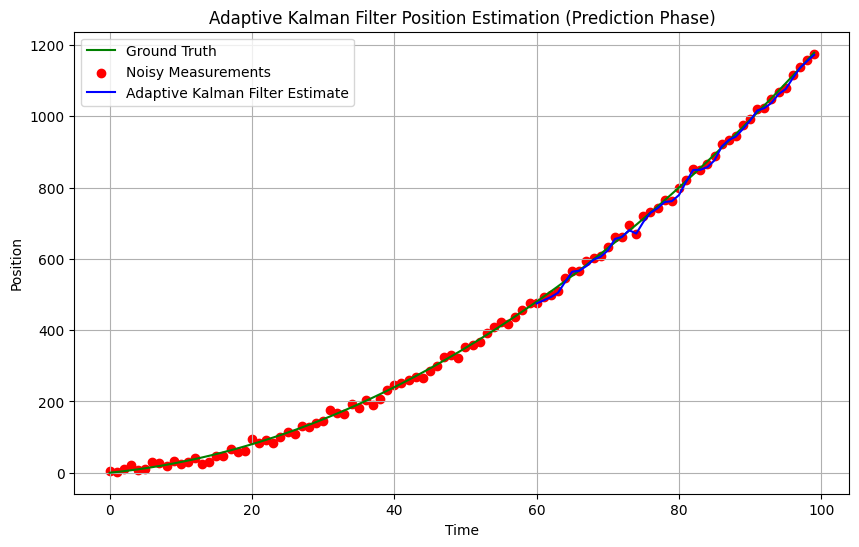

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class AdaptiveKalmanFilter:
    def __init__(self, initial_process_variance, initial_measurement_variance, initial_estimate_error, initial_estimate):
        self.estimate = initial_estimate
        self.estimate_error = initial_estimate_error
        self.process_variance = initial_process_variance
        self.measurement_variance = initial_measurement_variance

    def update(self, measurement):
        # Prediction update
        self.estimate_error += self.process_variance

        # Measurement update
        kalman_gain = self.estimate_error / (self.estimate_error + self.measurement_variance)
        innovation = measurement - self.estimate
        self.estimate += kalman_gain * innovation
        self.estimate_error = (1 - kalman_gain) * self.estimate_error

        # Adaptive update of process variance based on the innovation
        self.process_variance = max(1e-5, kalman_gain * innovation**2)

        return self.estimate

# Simulation parameters
np.random.seed(42)
time_steps = 100
initial_position = 0
initial_velocity = 2  # m/s
acceleration = 0.2  # m/s^2
initial_process_variance = 1e-2
initial_measurement_variance = 100

# Generate ground truth data (position) with constant acceleration
time = np.arange(0, time_steps, 1)
true_position = initial_position + initial_velocity * time + 0.5 * acceleration * time**2

# Add noise to simulate sensor data
noisy_measurements = true_position + np.random.normal(0, np.sqrt(initial_measurement_variance), size=time_steps)

# Split the data: 60% for training, 40% for prediction
train_size = int(0.6 * time_steps)
train_measurements = noisy_measurements[:train_size]
test_measurements = noisy_measurements[train_size:]
test_time = time[train_size:]
true_test_position = true_position[train_size:]

# Initialize the adaptive Kalman filter
akf = AdaptiveKalmanFilter(initial_process_variance, initial_measurement_variance, 1.0, 0.0)

# Apply the adaptive Kalman filter to the training data (first 60%)
for measurement in train_measurements:
    akf.update(measurement)

# Now, use the optimized filter to predict the ground truth for the next 40% data
kalman_estimates = []
for measurement in test_measurements:
    estimate = akf.update(measurement)
    kalman_estimates.append(estimate)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time, true_position, label="Ground Truth", color='g')
plt.scatter(time, noisy_measurements, label="Noisy Measurements", color='r', marker='o')
plt.plot(test_time, kalman_estimates, label="Adaptive Kalman Filter Estimate", color='b')
plt.xlabel("Time")
plt.ylabel("Position")
plt.title("Adaptive Kalman Filter Position Estimation (Prediction Phase)")
plt.legend()
plt.grid(True)
plt.show()

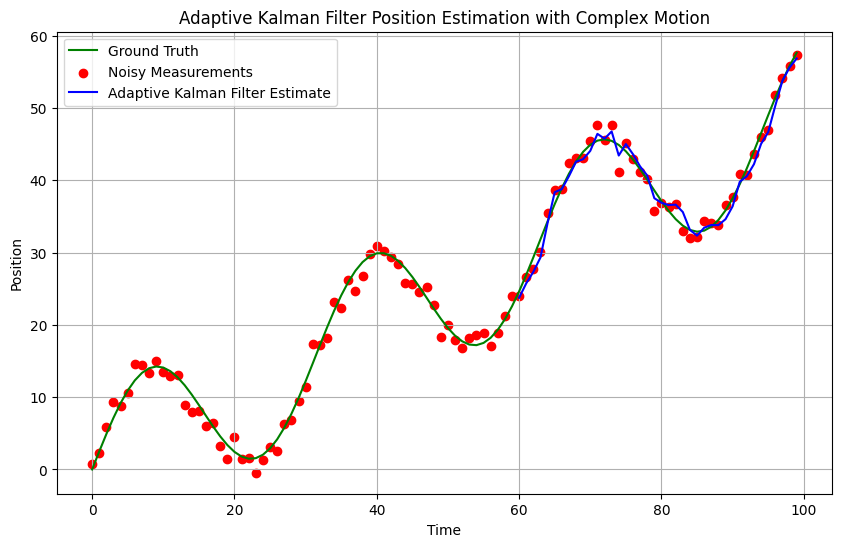

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class AdaptiveKalmanFilter:
    def __init__(self, initial_process_variance, initial_measurement_variance, initial_estimate_error, initial_estimate):
        self.estimate = initial_estimate
        self.estimate_error = initial_estimate_error
        self.process_variance = initial_process_variance
        self.measurement_variance = initial_measurement_variance

    def update(self, measurement):
        # Prediction update
        self.estimate_error += self.process_variance

        # Measurement update
        kalman_gain = self.estimate_error / (self.estimate_error + self.measurement_variance)
        innovation = measurement - self.estimate
        self.estimate += kalman_gain * innovation
        self.estimate_error = (1 - kalman_gain) * self.estimate_error

        # Adaptive update of process variance based on the innovation
        self.process_variance = max(1e-5, kalman_gain * innovation**2)

        return self.estimate

# Simulation parameters
np.random.seed(42)
time_steps = 100
initial_process_variance = 1e-2
initial_measurement_variance = 2

# Generate complex ground truth data (sinusoidal motion)
time = np.arange(0, time_steps, 1)
true_position = 10 * np.sin(0.2 * time) + 0.5 * time

# Add noise to simulate sensor data
noisy_measurements = true_position + np.random.normal(0, np.sqrt(initial_measurement_variance), size=time_steps)

# Split the data: 60% for training, 40% for prediction
train_size = int(0.6 * time_steps)
train_measurements = noisy_measurements[:train_size]
test_measurements = noisy_measurements[train_size:]
test_time = time[train_size:]
true_test_position = true_position[train_size:]

# Initialize the adaptive Kalman filter
akf = AdaptiveKalmanFilter(initial_process_variance, initial_measurement_variance, 1.0, 0.0)

# Apply the adaptive Kalman filter to the training data (first 60%)
for measurement in train_measurements:
    akf.update(measurement)

# Now, use the optimized filter to predict the ground truth for the next 40% data
kalman_estimates = []
for measurement in test_measurements:
    estimate = akf.update(measurement)
    kalman_estimates.append(estimate)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time, true_position, label="Ground Truth", color='g')
plt.scatter(time, noisy_measurements, label="Noisy Measurements", color='r', marker='o')
plt.plot(test_time, kalman_estimates, label="Adaptive Kalman Filter Estimate", color='b')
plt.xlabel("Time")
plt.ylabel("Position")
plt.title("Adaptive Kalman Filter Position Estimation with Complex Motion")
plt.legend()
plt.grid(True)
plt.show()

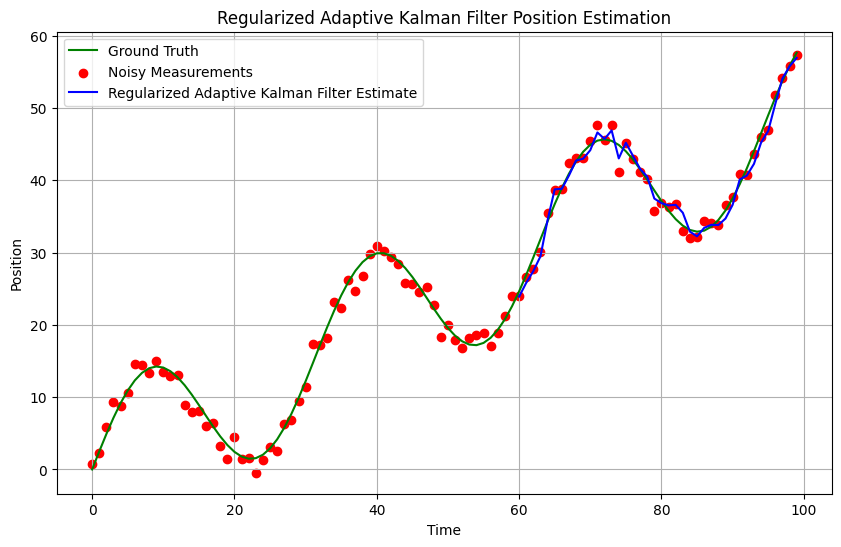

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class RegularizedAdaptiveKalmanFilter:
    def __init__(self, initial_process_variance, initial_measurement_variance, initial_estimate_error, initial_estimate, regularization_factor):
        self.estimate = initial_estimate
        self.estimate_error = initial_estimate_error
        self.process_variance = initial_process_variance
        self.measurement_variance = initial_measurement_variance
        self.regularization_factor = regularization_factor

    def update(self, measurement):
        # Prediction update
        self.estimate_error += self.process_variance

        # Measurement update with regularization
        kalman_gain = self.estimate_error / (self.estimate_error + self.measurement_variance)
        innovation = measurement - self.estimate

        # Regularization term to smooth the update
        regularization_term = self.regularization_factor * (self.estimate - measurement)
        self.estimate += kalman_gain * (innovation - regularization_term)

        self.estimate_error = (1 - kalman_gain) * self.estimate_error

        # Adaptive update of process variance based on the innovation
        self.process_variance = max(1e-5, kalman_gain * innovation**2)

        return self.estimate

# Simulation parameters
np.random.seed(42)
time_steps = 100
initial_process_variance = 1e-2
initial_measurement_variance = 2
regularization_factor = 0.1  # Adjust this factor to control the smoothness

# Generate complex ground truth data (sinusoidal motion)
time = np.arange(0, time_steps, 1)
true_position = 10 * np.sin(0.2 * time) + 0.5 * time

# Add noise to simulate sensor data
noisy_measurements = true_position + np.random.normal(0, np.sqrt(initial_measurement_variance), size=time_steps)

# Split the data: 60% for training, 40% for prediction
train_size = int(0.6 * time_steps)
train_measurements = noisy_measurements[:train_size]
test_measurements = noisy_measurements[train_size:]
test_time = time[train_size:]
true_test_position = true_position[train_size:]

# Initialize the regularized adaptive Kalman filter
rakf = RegularizedAdaptiveKalmanFilter(initial_process_variance, initial_measurement_variance, 1.0, 0.0, regularization_factor)

# Apply the regularized adaptive Kalman filter to the training data (first 60%)
for measurement in train_measurements:
    rakf.update(measurement)

# Now, use the optimized filter to predict the ground truth for the next 40% data
kalman_estimates = []
for measurement in test_measurements:
    estimate = rakf.update(measurement)
    kalman_estimates.append(estimate)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time, true_position, label="Ground Truth", color='g')
plt.scatter(time, noisy_measurements, label="Noisy Measurements", color='r', marker='o')
plt.plot(test_time, kalman_estimates, label="Regularized Adaptive Kalman Filter Estimate", color='b')
plt.xlabel("Time")
plt.ylabel("Position")
plt.title("Regularized Adaptive Kalman Filter Position Estimation")
plt.legend()
plt.grid(True)
plt.show()

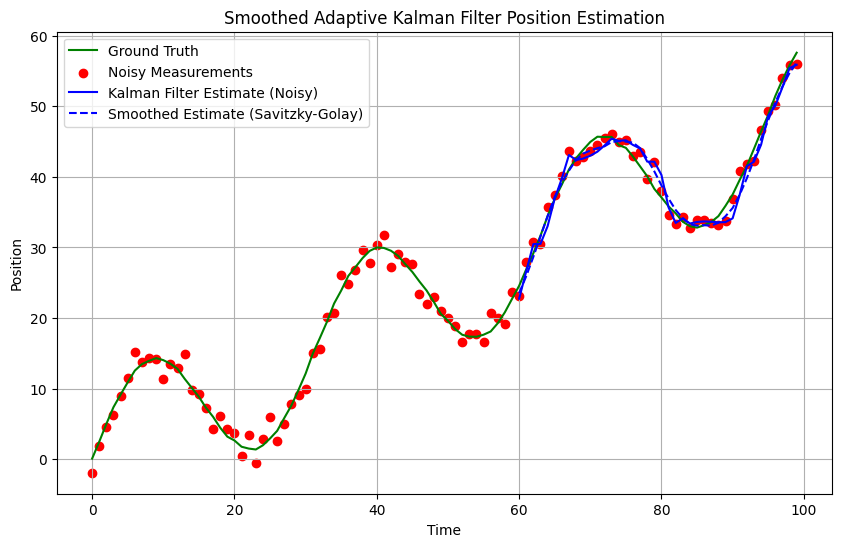

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

class AdaptiveKalmanFilter:
    def __init__(self, initial_process_variance, initial_measurement_variance, initial_estimate_error, initial_estimate):
        self.estimate = initial_estimate
        self.estimate_error = initial_estimate_error
        self.process_variance = initial_process_variance
        self.measurement_variance = initial_measurement_variance

    def update(self, measurement):
        # Prediction update
        self.estimate_error += self.process_variance

        # Measurement update
        kalman_gain = self.estimate_error / (self.estimate_error + self.measurement_variance)
        innovation = measurement - self.estimate
        self.estimate += kalman_gain * innovation
        self.estimate_error = (1 - kalman_gain) * self.estimate_error

        # Adaptive update of process variance based on the innovation
        self.process_variance = max(1e-5, kalman_gain * innovation**2)

        return self.estimate

# Simulation parameters
np.random.seed(42)
time_steps = 100
initial_process_variance = 1e-2
initial_measurement_variance = 2

# Generate complex ground truth data (sinusoidal motion)
time = np.arange(0, time_steps, 1)
true_position = 10 * np.sin(0.2 * time) + 0.5 * time + 0.1*np.random.normal(0, np.sqrt(initial_measurement_variance), size=time_steps)

# Add noise to simulate sensor data
noisy_measurements = true_position + np.random.normal(0, np.sqrt(initial_measurement_variance), size=time_steps)

# Split the data: 60% for training, 40% for prediction
train_size = int(0.6 * time_steps)
train_measurements = noisy_measurements[:train_size]
test_measurements = noisy_measurements[train_size:]
test_time = time[train_size:]
true_test_position = true_position[train_size:]

# Initialize the adaptive Kalman filter
akf = AdaptiveKalmanFilter(initial_process_variance, initial_measurement_variance, 1.0, 0.0)

# Apply the adaptive Kalman filter to the training data (first 60%)
for measurement in train_measurements:
    akf.update(measurement)

# Now, use the optimized filter to predict the ground truth for the next 40% data
kalman_estimates = []
for measurement in test_measurements:
    estimate = akf.update(measurement)
    kalman_estimates.append(estimate)

# Apply Savitzky-Golay filter for smoothing the Kalman filter output
smoothed_estimates = savgol_filter(kalman_estimates, window_length=11, polyorder=3)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time, true_position, label="Ground Truth", color='g')
plt.scatter(time, noisy_measurements, label="Noisy Measurements", color='r', marker='o')
plt.plot(test_time, kalman_estimates, label="Kalman Filter Estimate (Noisy)", color='b')
plt.plot(test_time, smoothed_estimates, label="Smoothed Estimate (Savitzky-Golay)", color='b',linestyle='dashed')
plt.xlabel("Time")
plt.ylabel("Position")
plt.title("Smoothed Adaptive Kalman Filter Position Estimation")
plt.legend()
plt.grid(True)
plt.show()

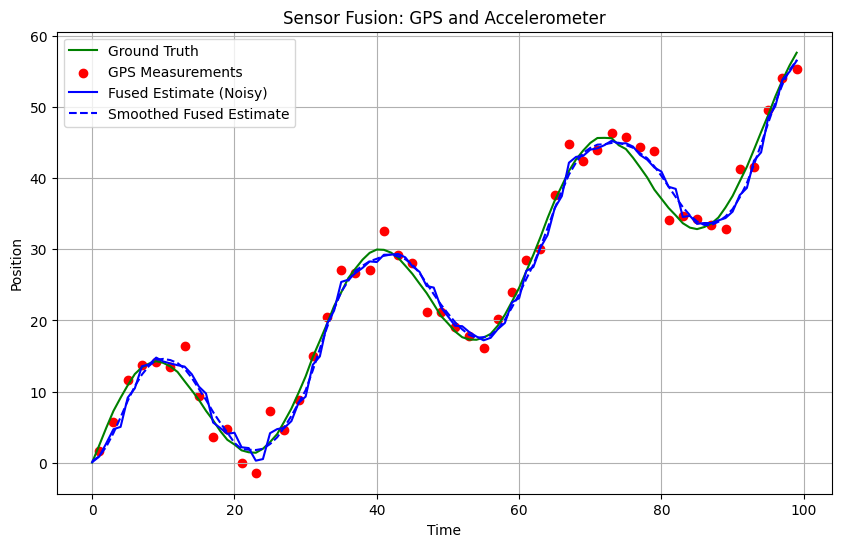

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

class AdaptiveKalmanFilter:
    def __init__(self, process_variance, measurement_variance, estimate_error, initial_estimate):
        self.estimate = initial_estimate
        self.estimate_error = estimate_error
        self.process_variance = process_variance
        self.measurement_variance = measurement_variance

    def update(self, measurement):
        self.estimate_error += self.process_variance
        kalman_gain = self.estimate_error / (self.estimate_error + self.measurement_variance)
        innovation = measurement - self.estimate
        self.estimate += kalman_gain * innovation
        self.estimate_error = (1 - kalman_gain) * self.estimate_error
        self.process_variance = max(1e-5, kalman_gain * innovation**2)
        return self.estimate

# Simulation parameters
np.random.seed(42)
time_steps = 100

# Ground truth (simulating the actual movement)
time = np.arange(0, time_steps, 1)
true_position = 10 * np.sin(0.2 * time) + 0.5 * time + 0.1 * np.random.normal(0, 1, size=time_steps)

# GPS data (less frequent, higher noise)
gps_measurements = true_position + np.random.normal(0, 2, size=time_steps)
gps_measurements[::2] = np.nan  # Simulate GPS dropout

# Accelerometer data (more frequent, lower noise)
acc_measurements = true_position + np.random.normal(0, 0.5, size=time_steps)

# Kalman Filter parameters for GPS and accelerometer
gps_kf = AdaptiveKalmanFilter(process_variance=1e-2, measurement_variance=4, estimate_error=1.0, initial_estimate=0.0)
acc_kf = AdaptiveKalmanFilter(process_variance=1e-2, measurement_variance=0.25, estimate_error=1.0, initial_estimate=0.0)

# Apply the Kalman filter to fuse GPS and accelerometer data
fused_estimates = []
for i in range(time_steps):
    if not np.isnan(gps_measurements[i]):
        gps_estimate = gps_kf.update(gps_measurements[i])
    else:
        gps_estimate = gps_kf.estimate  # Use the last estimate when GPS data is missing

    acc_estimate = acc_kf.update(acc_measurements[i])

    # Fusing the two estimates (simple averaging for this example)
    fused_estimate = (gps_estimate + acc_estimate) / 2
    fused_estimates.append(fused_estimate)

# Apply Savitzky-Golay filter for smoothing the fused output
smoothed_fused_estimates = savgol_filter(fused_estimates, window_length=11, polyorder=3)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time, true_position, label="Ground Truth", color='g')
plt.scatter(time, gps_measurements, label="GPS Measurements", color='r', marker='o')
plt.plot(time, fused_estimates, label="Fused Estimate (Noisy)", color='b')
plt.plot(time, smoothed_fused_estimates, label="Smoothed Fused Estimate", color='b', linestyle='dashed')
plt.xlabel("Time")
plt.ylabel("Position")
plt.title("Sensor Fusion: GPS and Accelerometer")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
gps_measurements

array([        nan,  1.63157623,         nan,  5.69417318,         nan,
       11.69939787,         nan, 13.7803964 ,         nan, 14.14384048,
               nan, 13.48536331,         nan, 16.39016992,         nan,
        9.45806601,         nan,  3.63865764,         nan,  4.74405679,
               nan, -0.05711026,         nan, -1.38308698,         nan,
        7.30276076,         nan,  4.67732947,         nan,  8.81785752,
               nan, 14.99145974,         nan, 20.4568274 ,         nan,
       27.04765043,         nan, 26.64699091,         nan, 27.04339094,
               nan, 32.5387279 ,         nan, 29.18312833,         nan,
       28.11284618,         nan, 21.21255325,         nan, 21.25287404,
               nan, 19.15564132,         nan, 17.79792081,         nan,
       16.16452311,         nan, 20.22345935,         nan, 23.97541088,
               nan, 28.47331049,         nan, 30.07524517,         nan,
       37.66285622,         nan, 44.79769815,         nan, 42.36

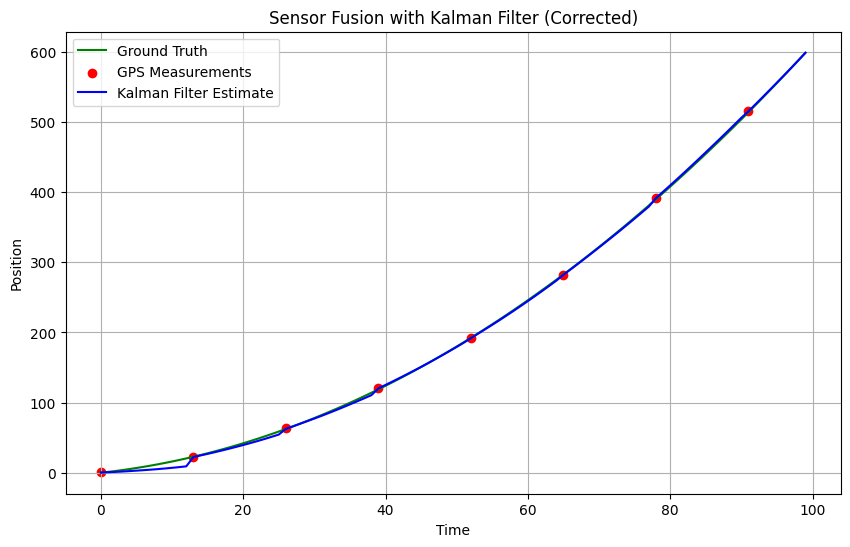

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class KalmanFilter:
    def __init__(self, dt, process_variance, measurement_variance_gps, measurement_variance_acc):
        self.dt = dt

        # State Vector: [position, velocity, acceleration]
        self.x = np.zeros(3)

        # Covariance Matrix
        self.P = np.eye(3)

        # State Transition Matrix
        self.F = np.array([[1, dt, 0.5 * dt**2],
                           [0, 1, dt],
                           [0, 0, 1]])

        # Process Noise Covariance Matrix
        self.Q = process_variance * np.array([[dt**4/4, dt**3/2, dt**2/2],
                                              [dt**3/2, dt**2, dt],
                                              [dt**2/2, dt, 1]])

        # Measurement Matrix for GPS (measuring position)
        self.H_gps = np.array([1, 0, 0])

        # Measurement Matrix for Accelerometer (measuring acceleration)
        self.H_acc = np.array([0, 0, 1])

        # Measurement Noise Covariance for GPS and Accelerometer
        self.R_gps = measurement_variance_gps
        self.R_acc = measurement_variance_acc

    def predict(self):
        # Predict the state
        self.x = np.dot(self.F, self.x)
        # Predict the error covariance
        self.P = np.dot(np.dot(self.F, self.P), self.F.T) + self.Q

    def update_gps(self, z):
        # Kalman Gain for GPS
        S = np.dot(np.dot(self.H_gps, self.P), self.H_gps.T) + self.R_gps
        K = np.dot(self.P, self.H_gps.T) / S

        # Update state with GPS measurement
        y = z - np.dot(self.H_gps, self.x)
        self.x += K * y

        # Update error covariance matrix
        I = np.eye(3)
        self.P = np.dot(I - np.outer(K, self.H_gps), self.P)

    def update_acc(self, z):
        # Kalman Gain for Accelerometer
        S = np.dot(np.dot(self.H_acc, self.P), self.H_acc.T) + self.R_acc
        K = np.dot(self.P, self.H_acc.T) / S

        # Update state with accelerometer measurement
        y = z - np.dot(self.H_acc, self.x)
        self.x += K * y

        # Update error covariance matrix
        I = np.eye(3)
        self.P = np.dot(I - np.outer(K, self.H_acc), self.P)

# Simulation parameters
np.random.seed(42)
time_steps = 100
dt = 1.0  # Time step

# True position, velocity, and acceleration (constant acceleration model)
true_acceleration = 0.1  # m/s^2
true_velocity = 1.0  # m/s
true_position = np.zeros(time_steps)
for i in range(1, time_steps):
    true_velocity += true_acceleration * dt
    true_position[i] = true_position[i-1] + true_velocity * dt + 0.5 * true_acceleration * dt**2

# Simulate GPS measurements (less frequent, higher noise)
gps_update_rate = 13  # GPS update every 5 time steps
gps_measurements = np.zeros(time_steps)
gps_noise_std = 1.5  # GPS measurement noise standard deviation
for i in range(0, time_steps, gps_update_rate):
    gps_measurements[i] = true_position[i] + np.random.normal(0, gps_noise_std)

# Simulate accelerometer measurements (continuous, lower noise)
acc_measurements = np.full(time_steps, true_acceleration)
acc_noise_std = 0.05  # Accelerometer noise standard deviation
acc_measurements += np.random.normal(0, acc_noise_std, size=time_steps)

# Initialize Kalman Filter
kf = KalmanFilter(dt, process_variance=1e-2, measurement_variance_gps=gps_noise_std**2, measurement_variance_acc=acc_noise_std**2)

# Apply the Kalman Filter
estimates = []
for i in range(time_steps):
    kf.predict()

    if i % gps_update_rate == 0:
        kf.update_gps(gps_measurements[i])
    else:
        kf.update_acc(acc_measurements[i])

    estimates.append(kf.x[0])  # Record position estimate

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(true_position, label="Ground Truth", color='g')
plt.scatter(np.arange(0, time_steps, gps_update_rate), gps_measurements[::gps_update_rate], label="GPS Measurements", color='r')
plt.plot(estimates, label="Kalman Filter Estimate", color='b')
plt.xlabel("Time")
plt.ylabel("Position")
plt.title("Sensor Fusion with Kalman Filter (Corrected)")
plt.legend()
plt.grid(True)
plt.show()

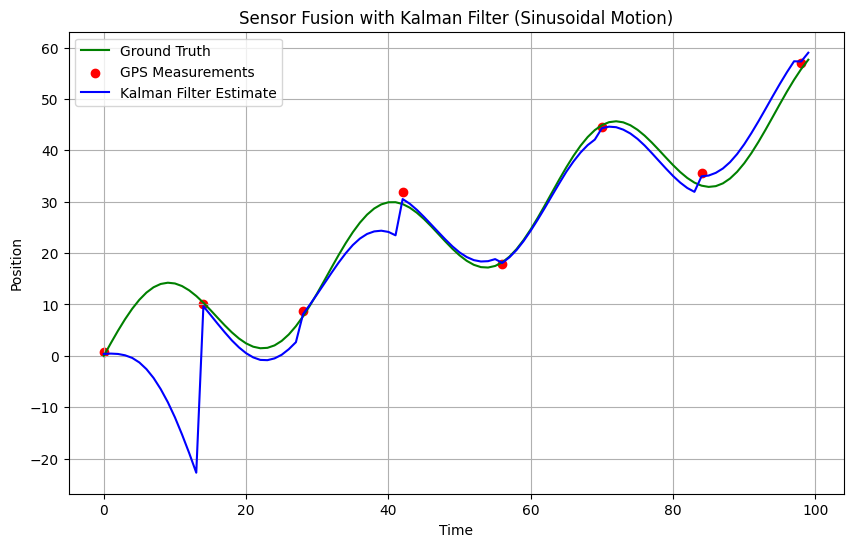

In [4]:
import numpy as np
import matplotlib.pyplot as plt

class KalmanFilter:
    def __init__(self, dt, process_variance, measurement_variance_gps, measurement_variance_acc):
        self.dt = dt

        # State Vector: [position, velocity, acceleration]
        self.x = np.zeros(3)

        # Covariance Matrix
        self.P = np.eye(3)

        # State Transition Matrix
        self.F = np.array([[1, dt, 0.5 * dt**2],
                           [0, 1, dt],
                           [0, 0, 1]])

        # Process Noise Covariance Matrix
        self.Q = process_variance * np.array([[dt**4/4, dt**3/2, dt**2/2],
                                              [dt**3/2, dt**2, dt],
                                              [dt**2/2, dt, 1]])

        # Measurement Matrix for GPS (measuring position)
        self.H_gps = np.array([1, 0, 0])

        # Measurement Matrix for Accelerometer (measuring acceleration)
        self.H_acc = np.array([0, 0, 1])

        # Measurement Noise Covariance for GPS and Accelerometer
        self.R_gps = measurement_variance_gps
        self.R_acc = measurement_variance_acc

    def predict(self):
        # Predict the state
        self.x = np.dot(self.F, self.x)
        # Predict the error covariance
        self.P = np.dot(np.dot(self.F, self.P), self.F.T) + self.Q

    def update_gps(self, z):
        # Kalman Gain for GPS
        S = np.dot(np.dot(self.H_gps, self.P), self.H_gps.T) + self.R_gps
        K = np.dot(self.P, self.H_gps.T) / S

        # Update state with GPS measurement
        y = z - np.dot(self.H_gps, self.x)
        self.x += K * y

        # Update error covariance matrix
        I = np.eye(3)
        self.P = np.dot(I - np.outer(K, self.H_gps), self.P)

    def update_acc(self, z):
        # Kalman Gain for Accelerometer
        S = np.dot(np.dot(self.H_acc, self.P), self.H_acc.T) + self.R_acc
        K = np.dot(self.P, self.H_acc.T) / S

        # Update state with accelerometer measurement
        y = z - np.dot(self.H_acc, self.x)
        self.x += K * y

        # Update error covariance matrix
        I = np.eye(3)
        self.P = np.dot(I - np.outer(K, self.H_acc), self.P)

# Simulation parameters
np.random.seed(42)
time_steps = 100
dt = 1.0  # Time step

# Generate complex ground truth data (sinusoidal motion)
time = np.arange(0, time_steps, dt)
true_position = 10 * np.sin(0.2 * time) + 0.5 * time
true_velocity = np.gradient(true_position, dt)
true_acceleration = np.gradient(true_velocity, dt)

# Simulate GPS measurements (less frequent, higher noise)
gps_update_rate = 14  # GPS update every 5 time steps
gps_measurements = np.zeros(time_steps)
gps_noise_std = 1.5  # GPS measurement noise standard deviation
for i in range(0, time_steps, gps_update_rate):
    gps_measurements[i] = true_position[i] + np.random.normal(0, gps_noise_std)

# Simulate accelerometer measurements (continuous, lower noise)
acc_measurements = np.full(time_steps, true_acceleration)
acc_noise_std = 0.05  # Accelerometer noise standard deviation
acc_measurements += np.random.normal(0, acc_noise_std, size=time_steps)

# Initialize Kalman Filter
kf = KalmanFilter(dt, process_variance=1e-2, measurement_variance_gps=gps_noise_std**2, measurement_variance_acc=acc_noise_std**2)

# Apply the Kalman Filter
estimates = []
for i in range(time_steps):
    kf.predict()

    if i % gps_update_rate == 0:
        kf.update_gps(gps_measurements[i])
    else:
        kf.update_acc(acc_measurements[i])

    estimates.append(kf.x[0])  # Record position estimate

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time, true_position, label="Ground Truth", color='g')
plt.scatter(time[::gps_update_rate], gps_measurements[::gps_update_rate], label="GPS Measurements", color='r')
plt.plot(time, estimates, label="Kalman Filter Estimate", color='b')
plt.xlabel("Time")
plt.ylabel("Position")
plt.title("Sensor Fusion with Kalman Filter (Sinusoidal Motion)")
plt.legend()
plt.grid(True)
plt.show()

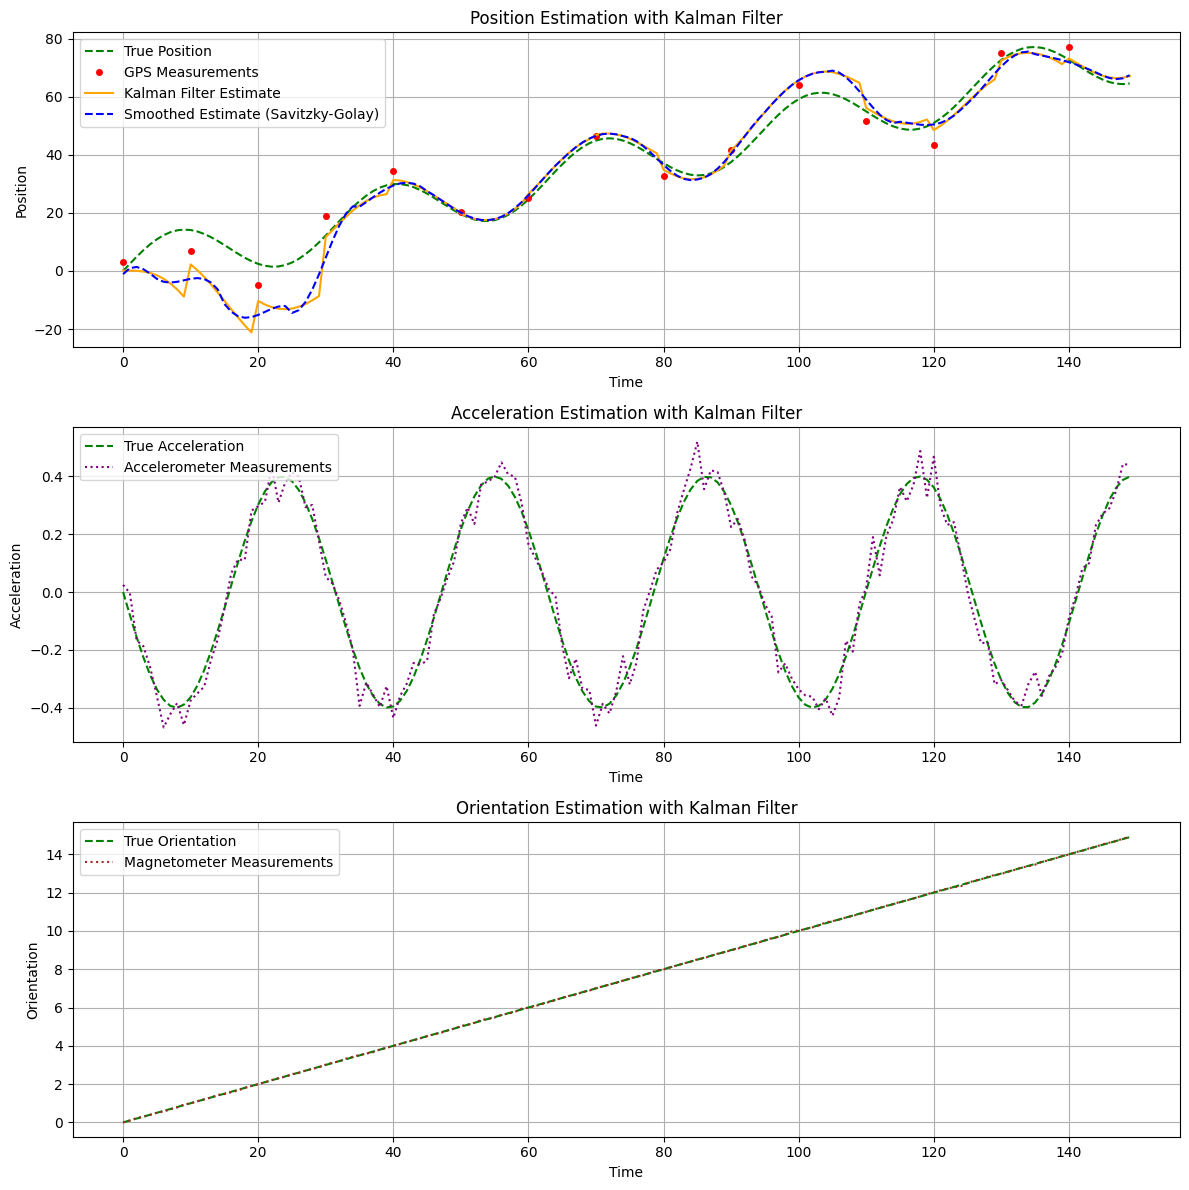

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

class KalmanFilter:
    def __init__(self, dt, process_variance, measurement_variance_gps, measurement_variance_acc, measurement_variance_mag):
        self.dt = dt

        # State Vector: [position, velocity, acceleration, orientation]
        self.x = np.zeros(4)

        # Covariance Matrix
        self.P = np.eye(4)

        # State Transition Matrix
        self.F = np.array([[1, dt, 0.5 * dt**2, 0],
                           [0, 1, dt, 0],
                           [0, 0, 1, 0],
                           [0, 0, 0, 1]])

        # Process Noise Covariance Matrix
        self.Q = process_variance * np.array([[dt**4/4, dt**3/2, dt**2/2, 0],
                                              [dt**3/2, dt**2, dt, 0],
                                              [dt**2/2, dt, 1, 0],
                                              [0, 0, 0, 1]])

        # Measurement Matrices for GPS (position), Accelerometer (acceleration), and Magnetometer (orientation)
        self.H_gps = np.array([1, 0, 0, 0])
        self.H_acc = np.array([0, 0, 1, 0])
        self.H_mag = np.array([0, 0, 0, 1])

        # Measurement Noise Covariance for GPS, Accelerometer, and Magnetometer
        self.R_gps = measurement_variance_gps
        self.R_acc = measurement_variance_acc
        self.R_mag = measurement_variance_mag

    def predict(self):
        # Predict the state
        self.x = np.dot(self.F, self.x)
        # Predict the error covariance
        self.P = np.dot(np.dot(self.F, self.P), self.F.T) + self.Q

    def update_gps(self, z):
        # Kalman Gain for GPS
        S = np.dot(np.dot(self.H_gps, self.P), self.H_gps.T) + self.R_gps
        K = np.dot(self.P, self.H_gps.T) / S

        # Update state with GPS measurement
        y = z - np.dot(self.H_gps, self.x)
        self.x += K * y

        # Update error covariance matrix
        I = np.eye(4)
        self.P = np.dot(I - np.outer(K, self.H_gps), self.P)

    def update_acc(self, z):
        # Kalman Gain for Accelerometer
        S = np.dot(np.dot(self.H_acc, self.P), self.H_acc.T) + self.R_acc
        K = np.dot(self.P, self.H_acc.T) / S

        # Update state with accelerometer measurement
        y = z - np.dot(self.H_acc, self.x)
        self.x += K * y

        # Update error covariance matrix
        I = np.eye(4)
        self.P = np.dot(I - np.outer(K, self.H_acc), self.P)

    def update_mag(self, z):
        # Kalman Gain for Magnetometer
        S = np.dot(np.dot(self.H_mag, self.P), self.H_mag.T) + self.R_mag
        K = np.dot(self.P, self.H_mag.T) / S

        # Update state with magnetometer measurement
        y = z - np.dot(self.H_mag, self.x)
        self.x += K * y

        # Update error covariance matrix
        I = np.eye(4)
        self.P = np.dot(I - np.outer(K, self.H_mag), self.P)

# Simulation parameters
np.random.seed(42)
time_steps = 150
dt = 1.0  # Time step

# Initialize Kalman Filter
kf = KalmanFilter(dt, process_variance=1e-2,
                  measurement_variance_gps=25,
                  measurement_variance_acc=0.0025,
                  measurement_variance_mag=0.0004)

# Lists to store data
estimates = []
acc_measurements = []
mag_measurements = []
gps_measurements = []
true_positions = []
true_orientations = []
true_accelerations = []

for i in range(time_steps):
    # Update true values (assuming some underlying model)
    true_position = 10 * np.sin(0.2 * i) + 0.5 * i
    true_velocity = 10 * 0.2 * np.cos(0.2 * i) + 0.5
    true_acceleration = -10 * 0.2**2 * np.sin(0.2 * i)
    true_orientation = 0.1 * i  # Linear increase in orientation as an example

    # Store true values for plotting
    true_positions.append(true_position)
    true_accelerations.append(true_acceleration)
    true_orientations.append(true_orientation)

    # Simulate accelerometer measurements (continuous, lower noise)
    acc_measurement = true_acceleration + np.random.normal(0, 0.05)
    acc_measurements.append(acc_measurement)

    # Simulate magnetic field measurements (continuous, low noise)
    mag_measurement = true_orientation + np.random.normal(0, 0.02)
    mag_measurements.append(mag_measurement)

    # Simulate GPS measurements (intermittent, higher noise)
    if i % 10 == 0:
        gps_measurement = true_position + np.random.normal(0, 5)
        gps_measurements.append(gps_measurement)
        kf.update_gps(gps_measurement)
    else:
        gps_measurements.append(np.nan)

    # Prediction step
    kf.predict()

    # Update step with Accelerometer and Magnetometer data
    kf.update_acc(acc_measurement)
    kf.update_mag(mag_measurement)

    estimates.append(kf.x[0])  # Record position estimate

# Apply Savitzky-Golay filter for smoothing the Kalman filter output
smoothed_estimates = savgol_filter(estimates, window_length=11, polyorder=3)

# Plot the results
plt.figure(figsize=(12, 12))

# Subplot 1: Position
plt.subplot(3, 1, 1)
plt.plot(range(time_steps), true_positions, label="True Position", color='green', linestyle='dashed')
plt.plot(range(time_steps), gps_measurements, label="GPS Measurements", color='red', marker='o', linestyle='None', markersize=4)
plt.plot(range(time_steps), estimates, label="Kalman Filter Estimate", color='orange')
plt.plot(range(time_steps), smoothed_estimates, label="Smoothed Estimate (Savitzky-Golay)", color='blue', linestyle='dashed')
plt.xlabel("Time")
plt.ylabel("Position")
plt.title("Position Estimation with Kalman Filter")
plt.legend()
plt.grid(True)

# Subplot 2: Acceleration
plt.subplot(3, 1, 2)
plt.plot(range(time_steps), true_accelerations, label="True Acceleration", color='green', linestyle='dashed')
plt.plot(range(time_steps), acc_measurements, label="Accelerometer Measurements", color='purple', linestyle='dotted')
plt.xlabel("Time")
plt.ylabel("Acceleration")
plt.title("Acceleration Estimation with Kalman Filter")
plt.legend()
plt.grid(True)

# Subplot 3: Orientation
plt.subplot(3, 1, 3)
plt.plot(range(time_steps), true_orientations, label="True Orientation", color='green', linestyle='dashed')
plt.plot(range(time_steps), mag_measurements, label="Magnetometer Measurements", color='brown', linestyle='dotted')
plt.xlabel("Time")
plt.ylabel("Orientation")
plt.title("Orientation Estimation with Kalman Filter")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
!apt-get install ffmpeg

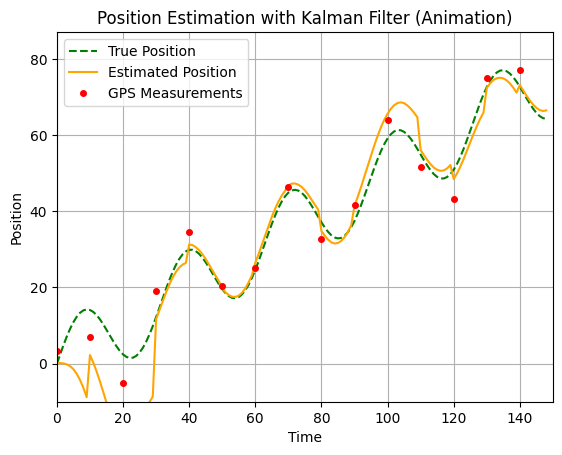

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.signal import savgol_filter

class KalmanFilter:
    def __init__(self, dt, process_variance, measurement_variance_gps, measurement_variance_acc, measurement_variance_mag):
        self.dt = dt
        self.x = np.zeros(4)
        self.P = np.eye(4)
        self.F = np.array([[1, dt, 0.5 * dt**2, 0],
                           [0, 1, dt, 0],
                           [0, 0, 1, 0],
                           [0, 0, 0, 1]])
        self.Q = process_variance * np.array([[dt**4/4, dt**3/2, dt**2/2, 0],
                                              [dt**3/2, dt**2, dt, 0],
                                              [dt**2/2, dt, 1, 0],
                                              [0, 0, 0, 1]])
        self.H_gps = np.array([1, 0, 0, 0])
        self.H_acc = np.array([0, 0, 1, 0])
        self.H_mag = np.array([0, 0, 0, 1])
        self.R_gps = measurement_variance_gps
        self.R_acc = measurement_variance_acc
        self.R_mag = measurement_variance_mag

    def predict(self):
        self.x = np.dot(self.F, self.x)
        self.P = np.dot(np.dot(self.F, self.P), self.F.T) + self.Q

    def update_gps(self, z):
        S = np.dot(np.dot(self.H_gps, self.P), self.H_gps.T) + self.R_gps
        K = np.dot(self.P, self.H_gps.T) / S
        y = z - np.dot(self.H_gps, self.x)
        self.x += K * y
        I = np.eye(4)
        self.P = np.dot(I - np.outer(K, self.H_gps), self.P)

    def update_acc(self, z):
        S = np.dot(np.dot(self.H_acc, self.P), self.H_acc.T) + self.R_acc
        K = np.dot(self.P, self.H_acc.T) / S
        y = z - np.dot(self.H_acc, self.x)
        self.x += K * y
        I = np.eye(4)
        self.P = np.dot(I - np.outer(K, self.H_acc), self.P)

    def update_mag(self, z):
        S = np.dot(np.dot(self.H_mag, self.P), self.H_mag.T) + self.R_mag
        K = np.dot(self.P, self.H_mag.T) / S
        y = z - np.dot(self.H_mag, self.x)
        self.x += K * y
        I = np.eye(4)
        self.P = np.dot(I - np.outer(K, self.H_mag), self.P)

# Simulation parameters
np.random.seed(42)
time_steps = 150
dt = 1.0  # Time step

kf = KalmanFilter(dt, process_variance=1e-2,
                  measurement_variance_gps=25,
                  measurement_variance_acc=0.0025,
                  measurement_variance_mag=0.0004)

estimates = []
acc_measurements = []
mag_measurements = []
gps_measurements = []
true_positions = []
true_orientations = []
true_accelerations = []

for i in range(time_steps):
    true_position = 10 * np.sin(0.2 * i) + 0.5 * i
    true_velocity = 10 * 0.2 * np.cos(0.2 * i) + 0.5
    true_acceleration = -10 * 0.2**2 * np.sin(0.2 * i)
    true_orientation = 0.1 * i

    true_positions.append(true_position)
    true_accelerations.append(true_acceleration)
    true_orientations.append(true_orientation)

    acc_measurement = true_acceleration + np.random.normal(0, 0.05)
    acc_measurements.append(acc_measurement)

    mag_measurement = true_orientation + np.random.normal(0, 0.02)
    mag_measurements.append(mag_measurement)

    if i % 10 == 0:
        gps_measurement = true_position + np.random.normal(0, 5)
        gps_measurements.append(gps_measurement)
        kf.update_gps(gps_measurement)
    else:
        gps_measurements.append(np.nan)

    kf.predict()
    kf.update_acc(acc_measurement)
    kf.update_mag(mag_measurement)

    estimates.append(kf.x[0])

smoothed_estimates = savgol_filter(estimates, window_length=11, polyorder=3)

# Create figure for animation
fig, ax = plt.subplots()
ax.set_xlim(0, time_steps)
ax.set_ylim(min(true_positions) - 10, max(true_positions) + 10)

line_true, = ax.plot([], [], label="True Position", color='green', linestyle='dashed')
line_estimated, = ax.plot([], [], label="Estimated Position", color='orange')
line_gps, = ax.plot([], [], label="GPS Measurements", color='red', marker='o', linestyle='None', markersize=4)

plt.xlabel("Time")
plt.ylabel("Position")
plt.title("Position Estimation with Kalman Filter (Animation)")
plt.legend()
plt.grid(True)

# Initialize animation lines
def init():
    line_true.set_data([], [])
    line_estimated.set_data([], [])
    line_gps.set_data([], [])
    return line_true, line_estimated, line_gps

# Update animation frame
def update(frame):
    line_true.set_data(np.arange(frame), true_positions[:frame])
    line_estimated.set_data(np.arange(frame), estimates[:frame])
    gps_data = np.array(gps_measurements[:frame])
    line_gps.set_data(np.arange(frame)[~np.isnan(gps_data)], gps_data[~np.isnan(gps_data)])
    return line_true, line_estimated, line_gps

# Create animation
ani = FuncAnimation(fig, update, frames=time_steps, init_func=init, blit=True, repeat=False)

# Save animation as AVI file
ani.save("kalman_filter_estimation.avi", writer='ffmpeg', fps=10)

plt.show()